In [1]:
import pandas as pd
% matplotlib inline

df_census = pd.read_csv('census_income_data.csv')
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


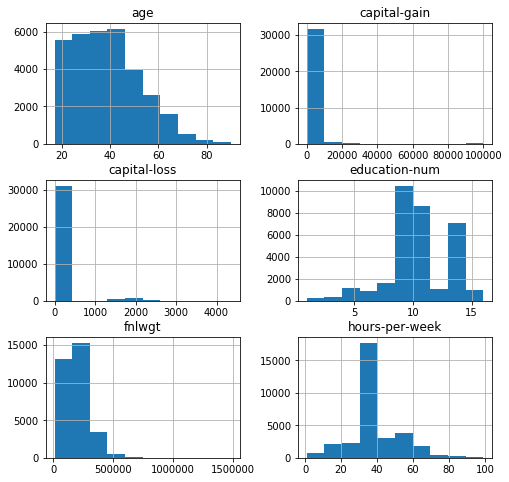

In [2]:
# View histograms for all numerical columns
# Add ';' at the end to suppress the unwanted output
df_census.hist(figsize=(8,8));

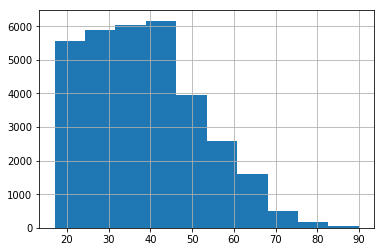

In [3]:
# Call a histogram for a specific column
df_census['age'].hist();

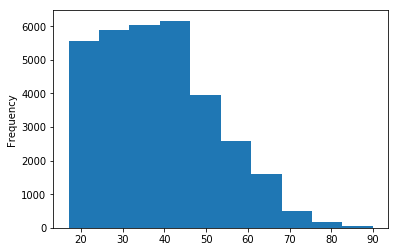

In [4]:
# Or we can use the plot function
df_census['age'].plot(kind='hist');

In [5]:
# Agregate counts for each unique values in 'education' column
df_census['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

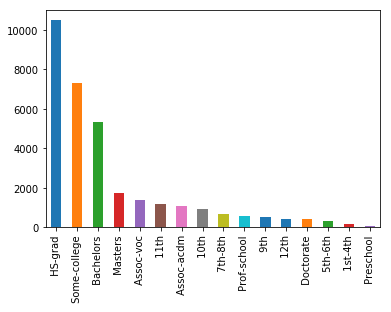

In [6]:
# Use plot function to create a bar chart
df_census['education'].value_counts().plot(kind='bar');

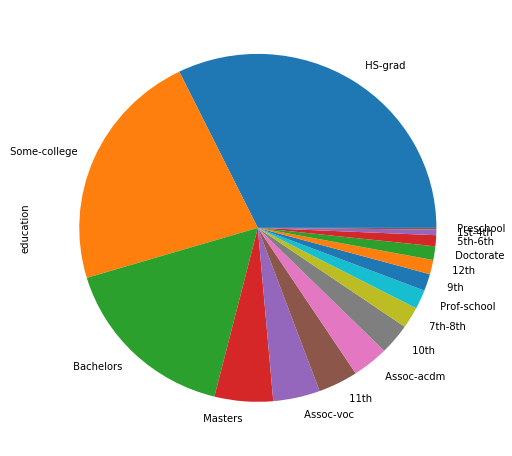

In [7]:
# Use plot function to create a pie chart
df_census['education'].value_counts().plot(kind='pie', figsize=(8,8));

In [8]:
df_cancer = pd.read_csv('cancer_data.csv')
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Remove "_mean" from column names
new_labels = []
for col in df_cancer.columns:
    if '_mean' in col:
        new_labels.append(col[:-5])  # exclude last 6 characters
    else:
        new_labels.append(col)

# New labels for our columns
new_labels

['id',
 'diagnosis',
 'radius',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'concavity',
 'concave_points',
 'symmetry',
 'fractal_dimension',
 'radius_SE',
 'texture_SE',
 'perimeter_SE',
 'area_SE',
 'smoothness_SE',
 'compactness_SE',
 'concavity_SE',
 'concave_points_SE',
 'symmetry_SE',
 'fractal_dimension_SE',
 'radius_max',
 'texture_max',
 'perimeter_max',
 'area_max',
 'smoothness_max',
 'compactness_max',
 'concavity_max',
 'concave_points_max',
 'symmetry_max',
 'fractal_dimension_max']

In [12]:
# Assign new labels to columns in dataframe
df_cancer.columns = new_labels

# Display first few rows of dataframe to confirm changes
df_cancer.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


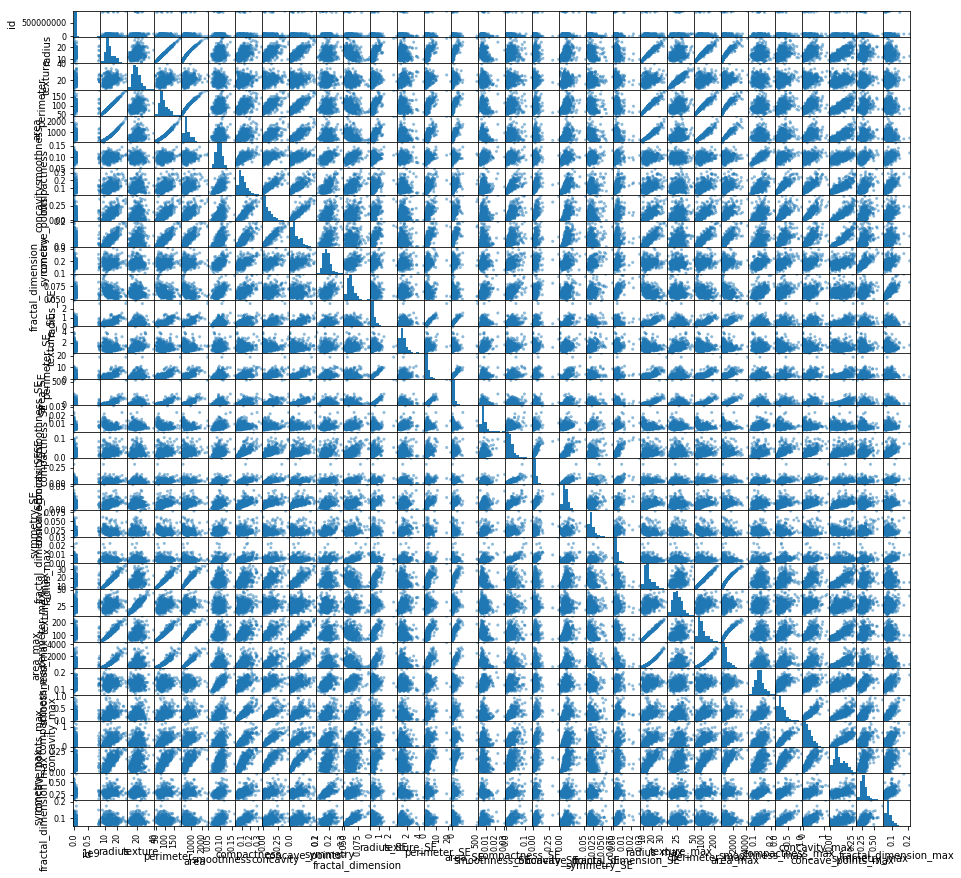

In [13]:
# Relationships among numerical variables with scatter plots
pd.plotting.scatter_matrix(df_cancer.head(5), figsize=(15,15));

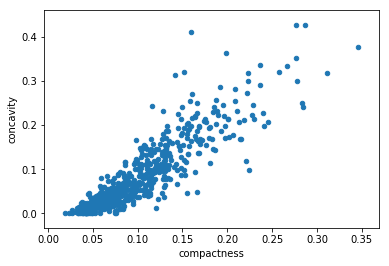

In [15]:
# Create a single scatter plot using 'plot' function
df_cancer.plot(x='compactness', y='concavity', kind='scatter');

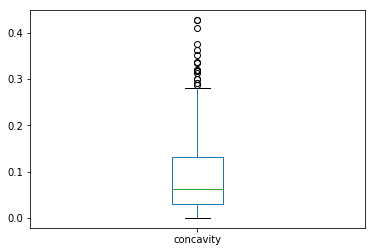

In [16]:
# Create a boxplot using 'plot' function
df_cancer.plot(x='compactness', y='concavity', kind='box');